In this notebook, I compare model outputs for re-run where datasets were split such that the test set corresponded to a subset of data appropriate as input for the GIOP model, the output of which I previously stored in a pandas_dataframe.
The compared quantity is $aphy(\lambda)$ which from this dataframe is obtained as:
    $$aph\_\lambda = apg\_\lambda - adg\_\lambda$$

In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import mean_absolute_error, r2_score
import arviz as az
import matplotlib.pyplot as pl

In [2]:
pl.style.use('bmh')

In [3]:
df_giop_test_set = pd.read_pickle('../PickleJar/DataSets/df_new_test_set.pkl')

In [4]:
bands = [col.split('_')[1] for col in df_giop_test_set.filter(regex='^rrs')]

In [5]:
df_aphy_giop = pd.DataFrame(index=df_giop_test_set.index)
for band in bands:
    df_aphy_giop[f'aϕ_{band}'] = df_giop_test_set[f'apg_{band}']\
    - df_giop_test_set[f'adg_{band}']

In [6]:
df_aphy_giop.sort_index()

,aϕ_412,aϕ_443,aϕ_490,aϕ_510,aϕ_555,aϕ_670
45,0.010077,0.013386,0.009206,0.005309,0.001684,0.005260
120,0.004476,0.006264,0.004334,0.002287,0.000609,0.002107
129,0.007754,0.010902,0.007548,0.003950,0.001036,0.003616
135,0.010371,0.014522,0.010048,0.005297,0.001409,0.004877
148,0.006316,0.009296,0.006466,0.003133,0.000706,0.002694
154,0.006297,0.009128,0.006341,0.003150,0.000746,0.002765
172,0.011277,0.015775,0.010914,0.005762,0.001537,0.005313
187,0.022373,0.028789,0.019730,0.012010,0.004234,0.012432
196,0.005546,0.007863,0.005450,0.002811,0.000716,0.002543
200,0.020689,0.027290,0.018753,0.010946,0.003554,0.010950


In [7]:
df_log_aphy_giop = pd.DataFrame(np.log10(df_aphy_giop.values),
                               columns=[f'log10_{col}' for col in df_aphy_giop.columns],
                               index=df_aphy_giop.index)

Load corresponding test set:

In [8]:
with open('../PickleJar/DataSets/AphiTrainTestSplitDataSets_4compw_GIOP.pkl',
          'rb') as fb:
    y_test = pickle.load(fb)['y_test']

In [9]:
y_test.sort_index()

,log10_aphy411,log10_aphy443,log10_aphy489,log10_aphy510,log10_aphy555,log10_aphy670
Row_ID,,,,,,
45,-1.533429,-1.442493,-1.622330,-1.853562,-2.318759,-1.875822
120,-1.773400,-1.721475,-1.918293,-2.168130,-2.667562,-2.436519
129,-1.738261,-1.704433,-1.947691,-2.235077,-2.829738,-2.563837
135,-1.803824,-1.757459,-2.022276,-2.325139,-3.040959,-2.659556
148,-2.103474,-2.008774,-2.226945,-2.542118,-3.251812,-2.879426
154,-2.064997,-1.973058,-2.213249,-2.545155,-3.366531,-3.017729
172,-2.026410,-1.930702,-2.164944,-2.485452,-3.214670,-2.826814
187,-1.481354,-1.341512,-1.507938,-1.728856,-2.265200,-1.946922
196,-1.907279,-1.768785,-1.989700,-2.214670,-2.749580,-2.411168


In [10]:
df_log_aphy_giop.drop_duplicates().sort_index()

,log10_aϕ_412,log10_aϕ_443,log10_aϕ_490,log10_aϕ_510,log10_aϕ_555,log10_aϕ_670
45,-1.996651,-1.873337,-2.035925,-2.274952,-2.773602,-2.279003
120,-2.349082,-2.203115,-2.363070,-2.640785,-3.215194,-2.676285
129,-2.110495,-1.962513,-2.122193,-2.403413,-2.984685,-2.441762
135,-1.984169,-1.837988,-1.997915,-2.276001,-2.851138,-2.311803
148,-2.199540,-2.031713,-2.189344,-2.504063,-3.150922,-2.569642
154,-2.200884,-2.039605,-2.197829,-2.501622,-3.127089,-2.558319
172,-1.947821,-1.802034,-1.962015,-2.239416,-2.813212,-2.274661
187,-1.650278,-1.540768,-1.704872,-1.920457,-2.373199,-1.905454
196,-2.256048,-2.104427,-2.263595,-2.551166,-3.144875,-2.594678
200,-1.684255,-1.563998,-1.726922,-1.960757,-2.449240,-1.960588


In [11]:
df_log_aphy_giop.rename(columns={'log10_aϕ_490': 'log10_aϕ_489'}, inplace=True)

In [12]:
df_log_aphy_giop.rename(columns={'log10_aϕ_412': 'log10_aϕ_411'}, inplace=True)

In [13]:
df_log_aphy_giop.rename(columns={f'{col}': f'{col}_giop'
                                 for col in df_log_aphy_giop.columns},
                       inplace=True)

### Comparing GIOP output with bayesian linear regression output

In [14]:
hs_res_path = '../PickleJar/Results/hshoe_model_dict_2019-07-01 16:15:23.850090.pkl'
with open(hs_res_path, 'rb') as fb:
    hs_res_dict = pickle.load(fb)
bnn_res_path = '../PickleJar/Results/bnn_ARD_1HL_hC_hyp_model_result_2019-07-02 19:33:25.077128.pkl'
with open(bnn_res_path, 'rb') as fb:
    bnn_res_dict = pickle.load(fb)

In [15]:
hs_res_dict[411]['model'].name

'hshoe_aphy411'

In [16]:
bnn_res_dict[411]['model'].name

'bnn_ARD_1HL_hC_hyp_aphy_411'

In [17]:
bands = [411, 443, 489, 510, 555, 670]

In [18]:
def get_test_result(band, res_dict):
    lkl = list(res_dict[band]['ppc_test'].keys())[0]
    ppc_test = res_dict[band]['ppc_test'][lkl]
    return ppc_test
    
def compute_test_stats(test_post, α=0.06):
    tp_mean = test_post.mean(axis=0)
    tp_hpd = az.hpd(test_post, credible_interval=1-α)
    return tp_mean, tp_hpd


def put_all_in_df(band, ppc_test, df_):
    
    post_mean, post_hpd = compute_test_stats(ppc_test)
    df = pd.DataFrame(np.c_[post_mean, post_hpd],
                      columns=[f'log10_aϕ_{band}_pred_mean',
                               f'log10_aϕ_{band}_pred_loCI',
                               f'log10_aϕ_{band}_pred_hiCI'],
                     index=df_.index)
    return df_.merge(df, right_index=True, left_index=True)


df_hs = pd.DataFrame(index=y_test.index)
df_bn = pd.DataFrame(index=y_test.index)
for band in bands:
    pt_hs = get_test_result(band, hs_res_dict)
    pt_bn = get_test_result(band, bnn_res_dict)
    df_hs = put_all_in_df(band, pt_hs, df_hs)
    df_bn = put_all_in_df(band, pt_bn, df_bn)

df_all = pd.merge(df_hs, df_bn, right_index=True, left_index=True,
                 suffixes=('_hs', '_bnn'))
df_all = pd.merge(df_log_aphy_giop, df_all, right_index=True, left_index=True)

df_all.drop_duplicates(inplace=True)

In [19]:
y_test

,log10_aphy411,log10_aphy443,log10_aphy489,log10_aphy510,log10_aphy555,log10_aphy670
Row_ID,,,,,,
129,-1.738261,-1.704433,-1.947691,-2.235077,-2.829738,-2.563837
196,-1.907279,-1.768785,-1.989700,-2.214670,-2.749580,-2.411168
135,-1.803824,-1.757459,-2.022276,-2.325139,-3.040959,-2.659556
200,-1.822752,-1.722849,-1.868061,-2.101275,-2.866461,-2.221126
172,-2.026410,-1.930702,-2.164944,-2.485452,-3.214670,-2.826814
45,-1.533429,-1.442493,-1.622330,-1.853562,-2.318759,-1.875822
204,-1.634138,-1.521434,-1.646276,-1.822175,-2.202040,-2.034798
430,-1.846490,-1.762205,-1.953895,-2.219683,-2.777284,-2.559091
274,-1.576754,-1.474696,-1.637706,-1.867100,-2.352617,-1.852633


In [20]:
y_test.rename(columns={f'{col}': f"{col.replace('phy', 'ϕ_')}_True"
                      for col in y_test.columns}, inplace=True)

In [21]:
y_test

,log10_aϕ_411_True,log10_aϕ_443_True,log10_aϕ_489_True,log10_aϕ_510_True,log10_aϕ_555_True,log10_aϕ_670_True
Row_ID,,,,,,
129,-1.738261,-1.704433,-1.947691,-2.235077,-2.829738,-2.563837
196,-1.907279,-1.768785,-1.989700,-2.214670,-2.749580,-2.411168
135,-1.803824,-1.757459,-2.022276,-2.325139,-3.040959,-2.659556
200,-1.822752,-1.722849,-1.868061,-2.101275,-2.866461,-2.221126
172,-2.026410,-1.930702,-2.164944,-2.485452,-3.214670,-2.826814
45,-1.533429,-1.442493,-1.622330,-1.853562,-2.318759,-1.875822
204,-1.634138,-1.521434,-1.646276,-1.822175,-2.202040,-2.034798
430,-1.846490,-1.762205,-1.953895,-2.219683,-2.777284,-2.559091
274,-1.576754,-1.474696,-1.637706,-1.867100,-2.352617,-1.852633


In [22]:
df_all = pd.merge(y_test, df_all, right_index=True, left_index=True)

In [23]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 14 entries, 129 to 187
Data columns (total 48 columns):
log10_aϕ_411_True             14 non-null float64
log10_aϕ_443_True             14 non-null float64
log10_aϕ_489_True             14 non-null float64
log10_aϕ_510_True             14 non-null float64
log10_aϕ_555_True             14 non-null float64
log10_aϕ_670_True             14 non-null float64
log10_aϕ_411_giop             14 non-null float64
log10_aϕ_443_giop             14 non-null float64
log10_aϕ_489_giop             14 non-null float64
log10_aϕ_510_giop             14 non-null float64
log10_aϕ_555_giop             14 non-null float64
log10_aϕ_670_giop             14 non-null float64
log10_aϕ_411_pred_mean_hs     14 non-null float64
log10_aϕ_411_pred_loCI_hs     14 non-null float64
log10_aϕ_411_pred_hiCI_hs     14 non-null float64
log10_aϕ_443_pred_mean_hs     14 non-null float64
log10_aϕ_443_pred_loCI_hs     14 non-null float64
log10_aϕ_443_pred_hiCI_hs     14 non-null f

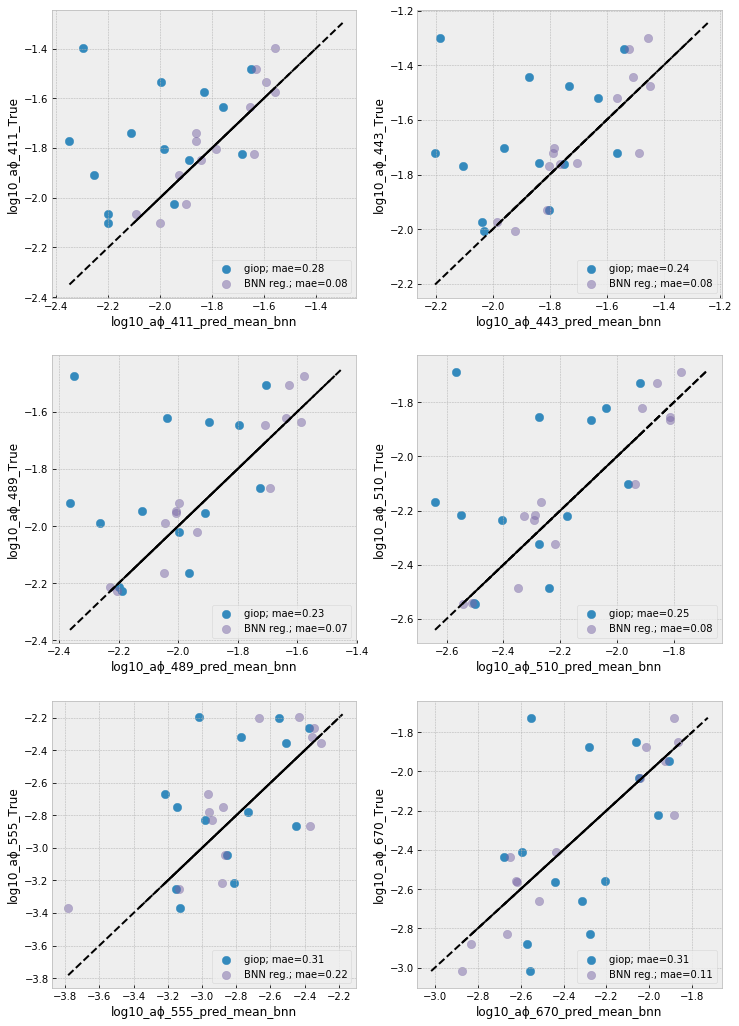

In [26]:
f, axs = pl.subplots(nrows=3, ncols=2, figsize=(12, 18 ))

for band, ax in zip(bands, axs.ravel()):
    vals = df_all[[f'log10_aϕ_{band}_True', f'log10_aϕ_{band}_giop',
                  f'log10_aϕ_{band}_pred_mean_hs',
                  f'log10_aϕ_{band}_pred_mean_bnn']]
    min_, max_ = vals.min(), vals.max()
        
    mae_giop = mean_absolute_error(df_all[f'log10_aϕ_{band}_True'],
                                   df_all[f'log10_aϕ_{band}_giop'])
    mae_hs = mean_absolute_error(df_all[f'log10_aϕ_{band}_True'],
                                 df_all[f'log10_aϕ_{band}_pred_mean_hs'])
    mae_bn = mean_absolute_error(df_all[f'log10_aϕ_{band}_True'],
                                 df_all[f'log10_aϕ_{band}_pred_mean_bnn'])
    df_all.plot.scatter(y=f'log10_aϕ_{band}_True', x=f'log10_aϕ_{band}_giop',
                        ax=ax, color='C0',
                        label=f'giop; mae={mae_giop:.2f}', s=70)
    #df_all.plot.scatter(y=f'log10_aϕ_{411}_True',
    #                    x=f'log10_aϕ_{band}_pred_mean_hs',
    #                    color='C1', ax=ax,
    #                    label=f'HS reg.; mae={mae_hs:.2f}')
    df_all.plot.scatter(y=f'log10_aϕ_{band}_True',
                        x=f'log10_aϕ_{band}_pred_mean_bnn',
                        color='C2', ax=ax,
                        label=f'BNN reg.; mae={mae_bn:.2f}', s=70, alpha=0.75)
    
    ax.legend(loc='lower right')
    ax.plot([min_, max_], [min_, max_], ls='--', color='k');